# **Intro:** Where does Feature Selection come in?
- After you've done the basic feature engineering steps:
  - Addressing Missing Values (Eg: using dropping, or imputation)
  - Looking at class imbalance?
  - Handling different input data types (categorical, numeric, etc.)
  - Normalisation (StandardScalar, or MinMaxScalar)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

# **Supervised**

Reference: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

### **Filter Based Methods**

- Select features on the basis of univariate statistics
  - Input Dataset: X = (f1, f2, ..., fn),
  - Output : Y
  - Calculates : Dependence(f1, y), Dependence(f2, y), ...., Dependence(fn, y)
  - How correlated is "each" feature (hence univariate) on the output?
- Finer points:
  - *Supervised*
  - Faster and computationally less expensive

#### Mutual Information
- Can be used for both classification and regression problems
- Can be used to pick up all kinds of relationships (even non-linear ones)
- Non-negative number, based on KL Divergence (similarity metric b/w distributions)

In [4]:
### Regression Problem - Predict how the blood sugar level will be after 1 year!
dataset = fetch_california_housing()

In [5]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [6]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [8]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

In [9]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x, y)

In [10]:
x.shape

(20640, 8)

In [11]:
print(mi)

[0.3878784  0.03179664 0.1032802  0.0241385  0.02145343 0.07262292
 0.3696912  0.40193034]


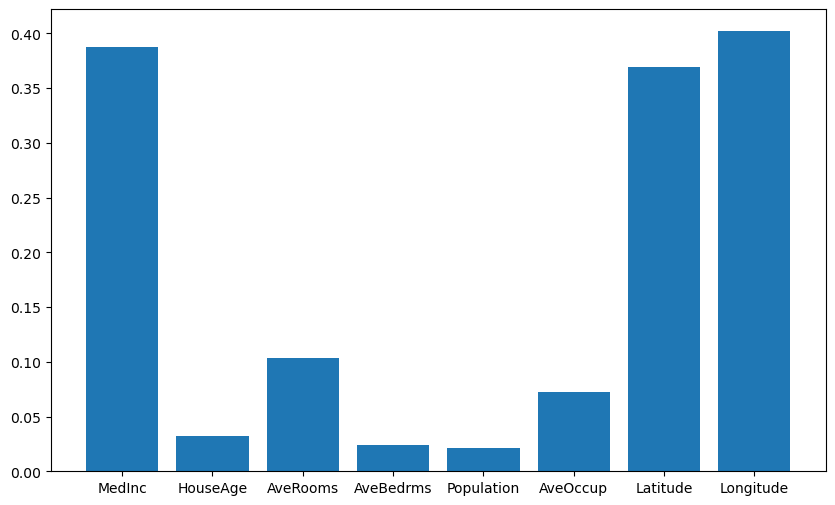

In [12]:
# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

# From Above graph, we understand that which data fields(columns) are having relation to get some information out.
Hence, let's make 50% from mutual info to find which columns out of these 8 are really has mening to draw some inferences here.

In [13]:
# Opti 1 - Method 1st to find the scoring function here as follows using percentile
# fit_tranformed - helps to get transfomred X & Y here.
x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)
print(x_new.shape)

(20640, 4)


In [15]:
# Option 2
x_new = SelectKBest(mutual_info_regression, k=4).fit_transform(x, y)
print(x_new.shape)

(20640, 4)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.592346476857007


# looking for some more details with r_regression, f_regression & mutual_info_regression

In [24]:
#r-regression - use of 
from sklearn.feature_selection import r_regression, mutual_info_classif, SelectKBest

In [26]:
x_new = SelectKBest(r_regression, k=5).fit_transform(x, y)
print(x_new.shape)

(20640, 5)


In [27]:
#f-regression - use of 
from sklearn.feature_selection import f_regression, mutual_info_classif, SelectKBest

In [28]:
x_new = SelectKBest(f_regression, k=5).fit_transform(x, y)
print(x_new.shape)

(20640, 5)


In [30]:
#mutual_info_regression - generally used for any kind of statistical dependency, 
#but then it is required more samples for acurate estimation.

from sklearn.feature_selection import mutual_info_regression, mutual_info_classif, SelectKBest

In [31]:
x_new = SelectKBest(mutual_info_regression, k=5).fit_transform(x, y)
print(x_new.shape)

(20640, 5)


#### Chi Squared
- Is used only for classification problems

#### Pearson Correlation


In [32]:
dataset = fetch_california_housing()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
print(x.shape)

(20640, 8)


**Two ways of usage**

a. Analyse the relationship between 'each' individual feature (input) and output

In [33]:
from sklearn.feature_selection import f_regression, SelectKBest

In [36]:
x_new = SelectKBest(f_regression, k=8).fit_transform(x, y)
print(x_new.shape)

(20640, 5)


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5346359610839535


In [44]:
# Just use of 6 or 5 column, let me try with 5 and the result little more correct and closer.
x_new = SelectKBest(f_regression, k=6).fit_transform(x, y)
print(x_new.shape)

(20640, 6)


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.6091399940608433


b. Analyses relationship b/w the features themselves
- Core Idea: Drop features which are highly correlated (dealing only on the input side)

In [46]:
import pandas as pd

In [47]:
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head(8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25


In [48]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# Pearson (linear reln), Kendall (non-linear), Spearman (non-linear)
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [49]:
import seaborn as sns

<Axes: >

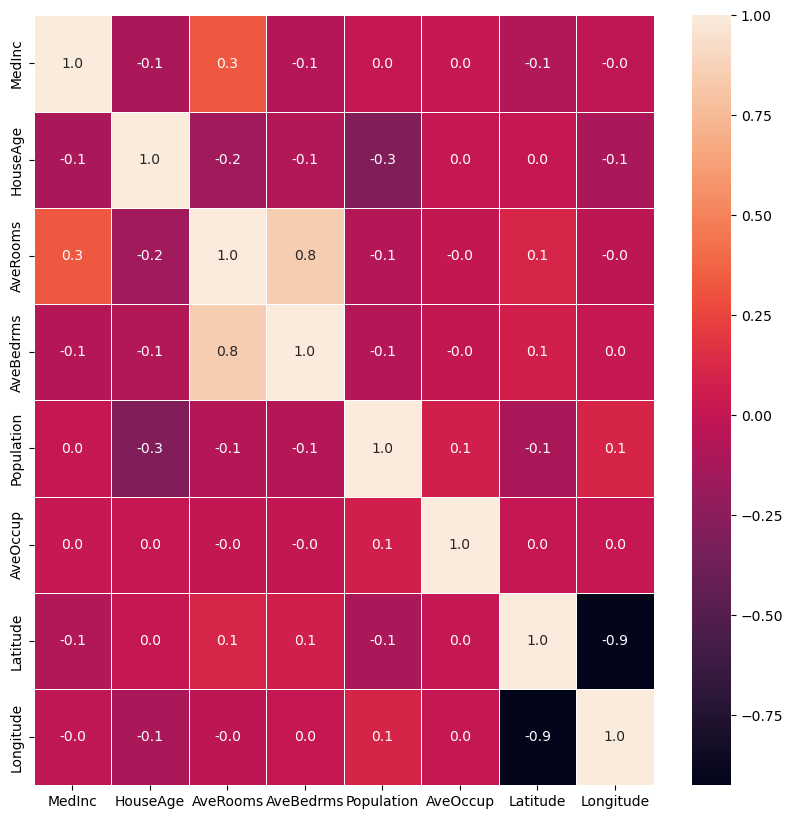

In [50]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [51]:
x_new = x_pd.drop(['AveOccup', 'Population'], axis=1)
x_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,37.85,-122.25


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5724731872681674


### **Wrapper Based Methods**
- Train a model on different subsets of features, and select the most accurate one.
- Supervised
- Computationally Expensive!

#### Recurive Feature Elimination (RFE)
- Given an estimator that assigns weights/coeffecients to the features (eg: linear model),
- It starts out by training the model on all the features.
- Then, recursively, removes the least important features, and re-trains the model.
- This process is repeated until we have the desired number of features.

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

# Regression
calhousing = fetch_california_housing()
X, y = calhousing.data, calhousing.target

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(X, y)
print(selector.ranking_, )

[1 1 4 3 1 2 1 1]


In [54]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 5)


In [55]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5880884952660097


#### Select from Model

In [61]:
# Using estimators that assign weights to the features

from sklearn.svm import LinearSVC
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectFromModel

In [62]:
X, y = load_iris(return_X_y=True)
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)

In [63]:
X_new = model.transform(X)
X_new.shape

(150, 3)

#### Sequential Feature Selection
- Doesn't require the underlying model to provide co-efficient weights, such as SelectFromModel, and RFE

- Forward:  Finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

- Backward: Starts from 'n' features, and removes 1 at a time till we reach the desired number of features

In [64]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

# Regression
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
ridge = RidgeCV().fit(X, y)

In [65]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(X, y)

print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV())


In [66]:
X_new = sfs_forward.transform(X)
X_new.shape

(442, 5)

In [67]:
## Important: You can now use any model with these newly selected features
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.444596882242308


### **Embedded Methods**
- As a function of the algorithm, feature selection automatically happens.
- Eg: Lasso Regularisation, Random-Forest

In [ ]:
# See prior notebook on lasso model

# **Unsupervised**

## PCA
- Dimenisonality Reduction technique that transforms the features into a new space where we can select features on the basis of variance captured (eigen values)
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [83]:
dataset = load_diabetes()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

print(x.shape)

(442, 10)


In [84]:
from sklearn.decomposition import PCA
X_new = PCA(n_components=4, svd_solver='full').fit_transform(x)
print(X_new.shape)

(442, 4)


In [85]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.49943683803422245


In [ ]:
# also lets try - Feature selection as part of pieline.

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [79]:
clf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(dual="auto"))), ('classification', RandomForestClassifier())])
clf.fit(X, y)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual='auto'))),
                ('classification', RandomForestClassifier())])